# Problem Statement
## Q1 Your views about the problem statement ?
The problem statement is straightforward and has the potential to be a valuable tool for TechWorks Consulting. By creating a machine learning model to predict employee salary, the company can ensure consistency and fairness in their compensation practices. It can also help them identify employees who may be underpaid or overpaid relative to their peers.

## Q2 What will be your approach to solving this task?
My approach to solving this task would be to start by exploring the data and cleaning it as necessary. I would then create a machine learning model using a regression algorithm. I would evaluate the performance of the model on a test set and then use it to predict the salary of new employees.
- **Data Description:** The Dataset conatins information about colleges, cities, roles, previous experience, and salary. This information will be used to train and test the predictive model.
- **Data Preprocessing:** Data Preprocessing is most important task as it involves tasks like handling missing values, outliers, categorical variables, normalization, and feature selection.

## Q3  What were the available ML model options you had to perform this task?
There are a number of ML model options that could be used to perform this task, including linear regression, lasso regression, ridge regression, k-nearest neighbors regression,Decision Tree, random forest regression, and gradient boosted regression.

# Creating a Salary Prediction Model: A Systematic Approach
- **Data Understanding:**
  - Begin by thoroughly understanding the provided dataset, including its structure, columns, and the meaning of each variable. Gain insights into the data's distribution, summary statistics, and potential outliers.
- **Data Preprocessing:**
  - Handle Missing Values: Identify and address missing data by imputation or removal, ensuring that data is complete.
  - Outlier Detection and Treatment: Detect and handle outliers in the dataset, which could impact the model's accuracy.
  - Convert Categorical Data: Transform categorical variables (e.g., "College" and "City") into numerical format.
  - Normalize Data: Normalize numerical features to bring them to a common scale to avoid any feature dominating the model.
  - Feature Selection: Use statistical techniques such as Lasso, Ridge, or correlation analysis to select the most relevant features for salary prediction.
- **Performing Exploratory Data Analysis (EDA)**
- **Model Selection:**
    - Choose different regression models (e.g., Linear Regression, Multi Linear Regression) to build and evaluate the predictive models.
- **Model Training and Evaluation:**
    - Split the dataset into training and testing sets to train the models and assess their performance.
    - Use appropriate evaluation metrics like Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE) to measure the model's accuracy.
    - Experiment with different hyperparameters for each model and use cross-validation to avoid overfitting.
- **Model Comparison:**
    - Compare the performance of different models and select the one with the best accuracy and generalization.
- **Further Improvement:**
    - Consider additional techniques for model improvement, such as feature engineering, hyperparameter tuning, and ensemble methods.

# Predicting Employee Salaries at TechWorks Consulting: Exploring Machine Learning Models
##### When tackling the task of predicting employee salaries at TechWorks Consulting, a variety of machine learning models are available for regression analysis. The optimal choice depends on several factors, including the characteristics of the data, the complexity of the salary prediction problem, and the importance of model interpretability.
**1. Linear Regression:**
- Linear regression is a simple and interpretable model that assumes a linear relationship between the features and the target variable (salary). It's a good starting point and can provide baseline performance.

**2. Ridge Regression and Lasso Regression:** Ridge and Lasso regression are **regularization techniques** that build upon linear regression. They address potential issues like multicollinearity (high correlation between features) and overfitting (the model performing well on training data but poorly on new data). They achieve this by adding penalty terms to the linear regression cost function.

-   **Ridge Regression:**
    Adds a penalty proportional to the square of the magnitude of the coefficients. This tends to shrink coefficients towards zero, but not exactly to zero.

-   **Lasso Regression:**
    Adds a penalty proportional to the absolute value of the coefficients. This can force some coefficients to become exactly zero, effectively performing feature selection.
  
**3. Decision Trees:**  Decision tree-based models, like Random Forest and Gradient Boosting, are capable of capturing non-linear relationships in the data. They can handle both numerical and categorical features and automatically deal with feature importance.

-  **Random Forest:** An ensemble learning method that combines multiple decision trees. Each tree is trained on a random subset of the data and features, reducing overfitting and improving generalization. Predictions are made by averaging the predictions of all trees.

-  **Gradient Boosting:** Another ensemble method that sequentially builds trees. Each tree is trained to correct the errors made by the previous trees. This iterative process gradually improves the model's accuracy.
    
**4. K-Nearest Neighbors (KNN):** - KNN is a non-parametric method that makes predictions based on the average (for regression) or majority vote (for classification) of the 'k' nearest data points in the feature space. It's a simple and intuitive algorithm that can be effective for small to medium-sized datasets.
- **Value of 'k':** The parameter 'k' (number of neighbors) is crucial. A small 'k' can lead to overfitting, while a large 'k' can smooth out decision boundaries too much.



# Import library 

In [110]:
# Import the pandas library for data manipulation and analysis
# Import the numpy library for numerical operations and array processing
# Import the seaborn library for data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
#--------------------------------------------------------------------------------------------------------------------------->
# sklearn library 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


# Import the data from cvc file 

In [111]:
# Load the data from the csv file
df = pd.read_csv('ML case Study.csv')
cities = pd.read_csv('cities.csv')
college =pd.read_csv('Colleges.csv')

In [112]:
# Disable all warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)

In [113]:
# Overview of the data 
df.head(2)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87


In [114]:
# To see the rows and column in dataset 
df.shape

(1589, 8)

In [115]:
# To see the NUll value in the dataset 
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [116]:
# Overview of the cities table dataset 
cities.head(2)

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur


In [117]:
# information about a DataFrame including the index dtype and columns, non-null values and memory usage.
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Metrio City       9 non-null      object
 1   non-metro cities  8 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [118]:
# change the dataype float to int 
df['Previous job change']=df['Previous job change'].astype(int)

In [119]:
# Fill NA/NaN values using the specified method. I use Here Mode of Non-metro city
cities['non-metro cities'].fillna(cities['non-metro cities'].mode()[0],inplace=True)

In [120]:
# creat the array for metro_city and non_metro city 
metro_cities = cities['Metrio City'].unique()
non_metro_cities = cities['non-metro cities'].unique()

In [121]:
# degine the function to replace the city value in dummy customize values
def replace_cities(city):
    if city in metro_cities:
        return 1
    elif city in non_metro_cities:
        return 0

In [122]:
# call replace _cities fucntion to replace the values
df['City'] = df['City'].apply(replace_cities)

In [123]:
df['City']

0       0
1       0
2       0
3       0
4       0
       ..
1584    1
1585    0
1586    1
1587    0
1588    1
Name: City, Length: 1589, dtype: int64

In [124]:
# This function returns the first 5 rows, It is useful for quickly testing the dataset
df.head(5)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,0,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,0,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",0,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",0,Executive,49010.0,2,81,33,82092.39
4,DTU,0,Executive,57879.0,4,74,32,73878.10


In [125]:
# This function returns the first 2 rows, It is useful for quickly testing the dataset
college.head(2)

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University


In [126]:
# information about a collage including the index dtype and columns, non-null values and memory usage.
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [127]:
Tier1=college['Tier 1'].unique()
Tier2=college['Tier 2'].unique()
Tier3=college['Tier 3'].unique()

In [128]:
# define a function to replace the value in customize dummy values 
#if college name is in Tier1, Tier2, Tier3 column and replace the collage name with 3,2,1 for further analysis 
def replace_college(college):
    if college in Tier1:
        return 3
    elif college in Tier2:
        return 2
    elif college in Tier3:
        return 1 


In [129]:
# call the replace fucntion 
df["College"] = df["College"].apply(replace_college)

In [130]:
df["College"]

0       2
1       2
2       1
3       1
4       3
       ..
1584    3
1585    3
1586    3
1587    3
1588    2
Name: College, Length: 1589, dtype: int64

In [131]:
# See the null value in dataset 
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [132]:
# Random sample method return Dataframe randomly , it return randomly  selected rows
df.sample(4)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
831,3,1,Executive,53563.0,3,69,36,55882.26
1048,3,0,Executive,48934.0,3,73,25,58063.01
317,1,0,Executive,59922.0,3,42,54,86260.00
551,2,1,Executive,52160.0,3,40,32,59944.47


In [133]:
# Statistical info about numerical data Such as : mean, count, standard deviation, median 
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,2.024544,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


#  Performance of Regression Models on Features for CTC Prediction (After Outlier Removal)

### Boxplot Graph to see outlier

In [134]:
df1 = df

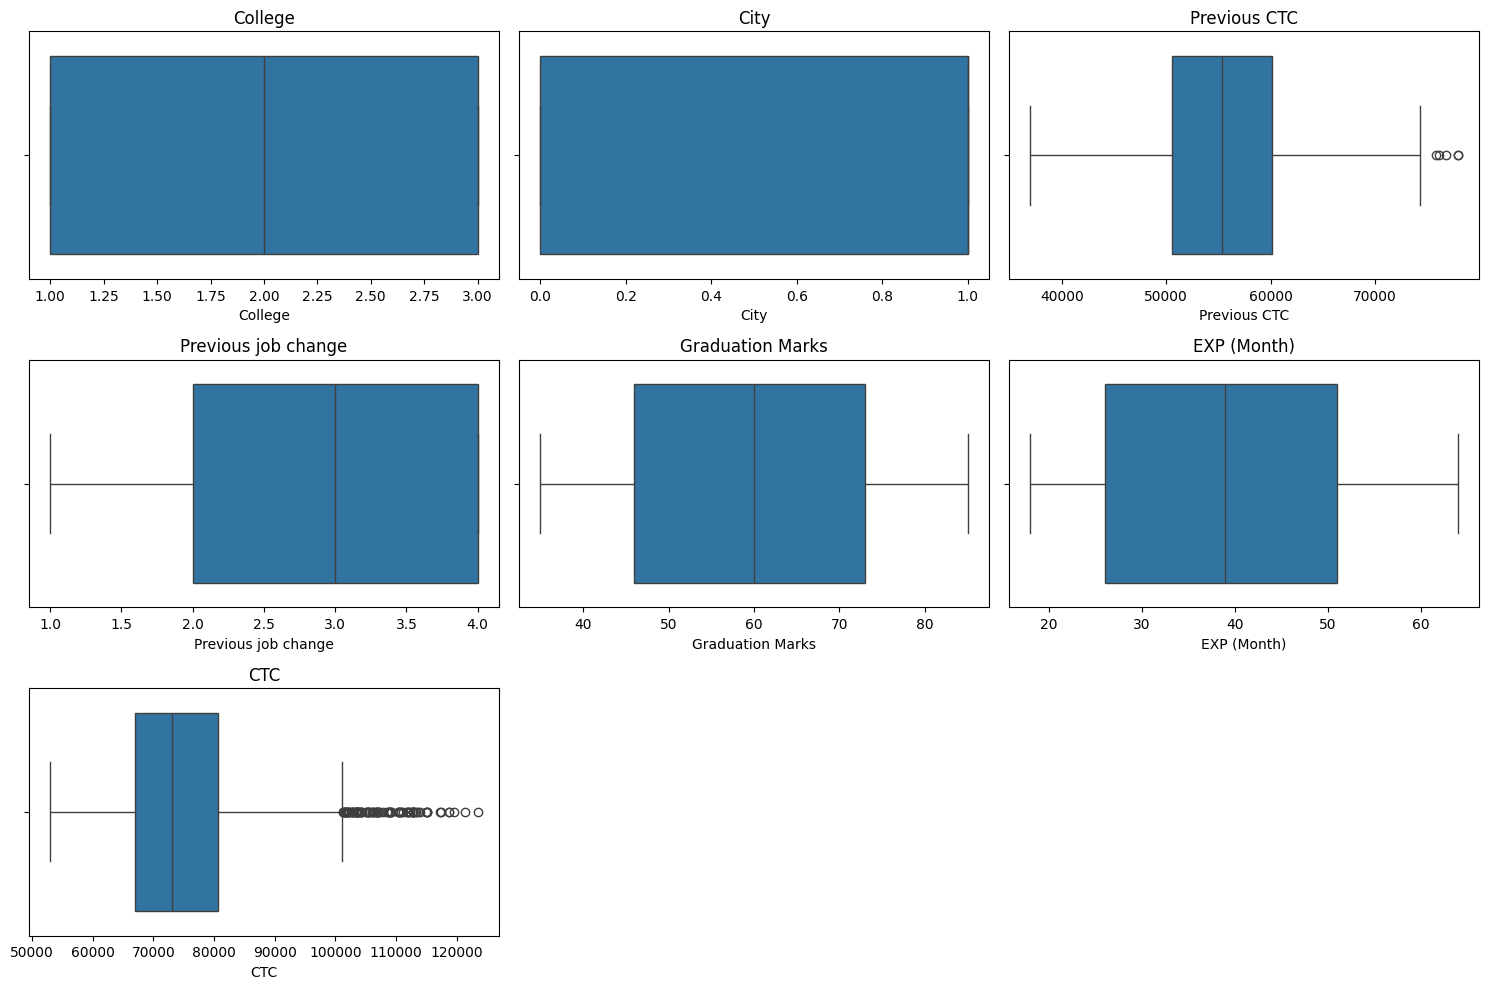

In [135]:
# Plot Boxplot for each feature to examine the Outlier in the features.
# Create a figure with a specified size (15 inches wide, 10 inches tall)
plt.figure(figsize=(15, 10)) 

# Iterate through each int64 and float64 column in the DataFrame 
for i,col in enumerate(df1.select_dtypes(include=['float64','int64'])): 
     # Create a subplot in a 3x3 grid,
    plt.subplot(3,3,i+1)
    # Generate a boxplot
    sns.boxplot(x=col,data=df1)
    # Set the title of the subplot to the column name
    plt.title(col)
# Adjust the spacing between subplots to prevent overlapping
plt.tight_layout()

# Display the figure with all the subplots
plt.show()
    

### Outlier Treatment using the Interquartile Range (IQR)

In [136]:
# for column in df1.select_dtypes(include=['float64','int64']):
#     # Calculate the first quartile : 25th percentile
#     Q1 = df1[column].quantile(0.25)
#     # Calculate the third quartile : 75th percentile
#     Q3 = df1[column].quantile(0.75)
#     # Calculate the interquartile range (IQR)
#     IQR = Q3 - Q1 
#      # Calculate the lower bound for outlier detection
#     lower_bound = Q1 - 1.5 * IQR
#     # Calculate the upper bound for outlier detection
#     upper_bound = Q3 + 1.5 * IQR
#     # Replace values below the lower bound with the lower bound
#     df1[column] = np.where(df1[column] < lower_bound, lower_bound, df1[column])
#     # Replace values below the lower bound with the upper bound
#     df1[column] = np.where(df1[column] > upper_bound, upper_bound, df1[column])

```In this project, I explored different approaches to dealing with outliers in a dataset of CTC predictions. We found that removing outliers can have a significant impact on the R2 score and MAE, especially when the outliers are extreme. However, in this particular case, we decided not to remove the outliers because they represent real-world data and removing them could bias our model.```

### correlation  

In [137]:
# Converting Categorical Column 'Role' into Dummy variable
df=pd.get_dummies(data=df,columns=['Role'],drop_first=True,dtype='int64')

In [138]:
corr = df.corr()
corr

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,-0.041979,0.055060,-0.003539,-0.011752,0.029592,0.014749
City,0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,-0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,-0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),-0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


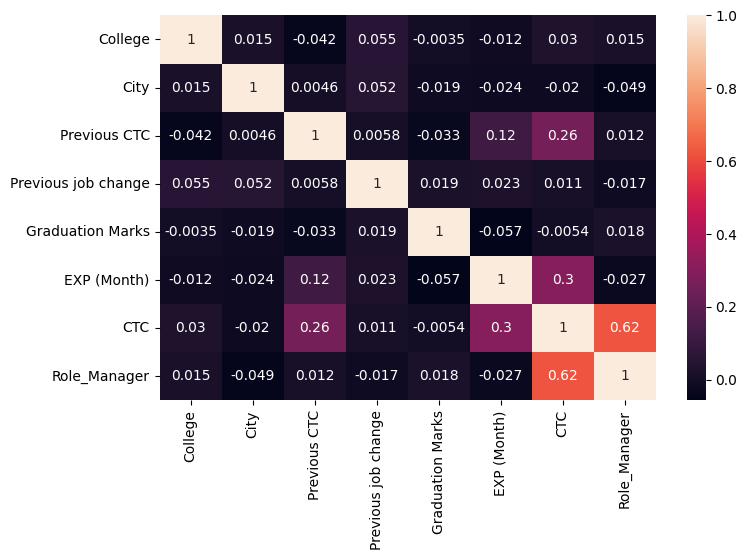

In [139]:
plt.figure(figsize=(8,5))
sns.heatmap(data=corr,annot=True)
plt.show()

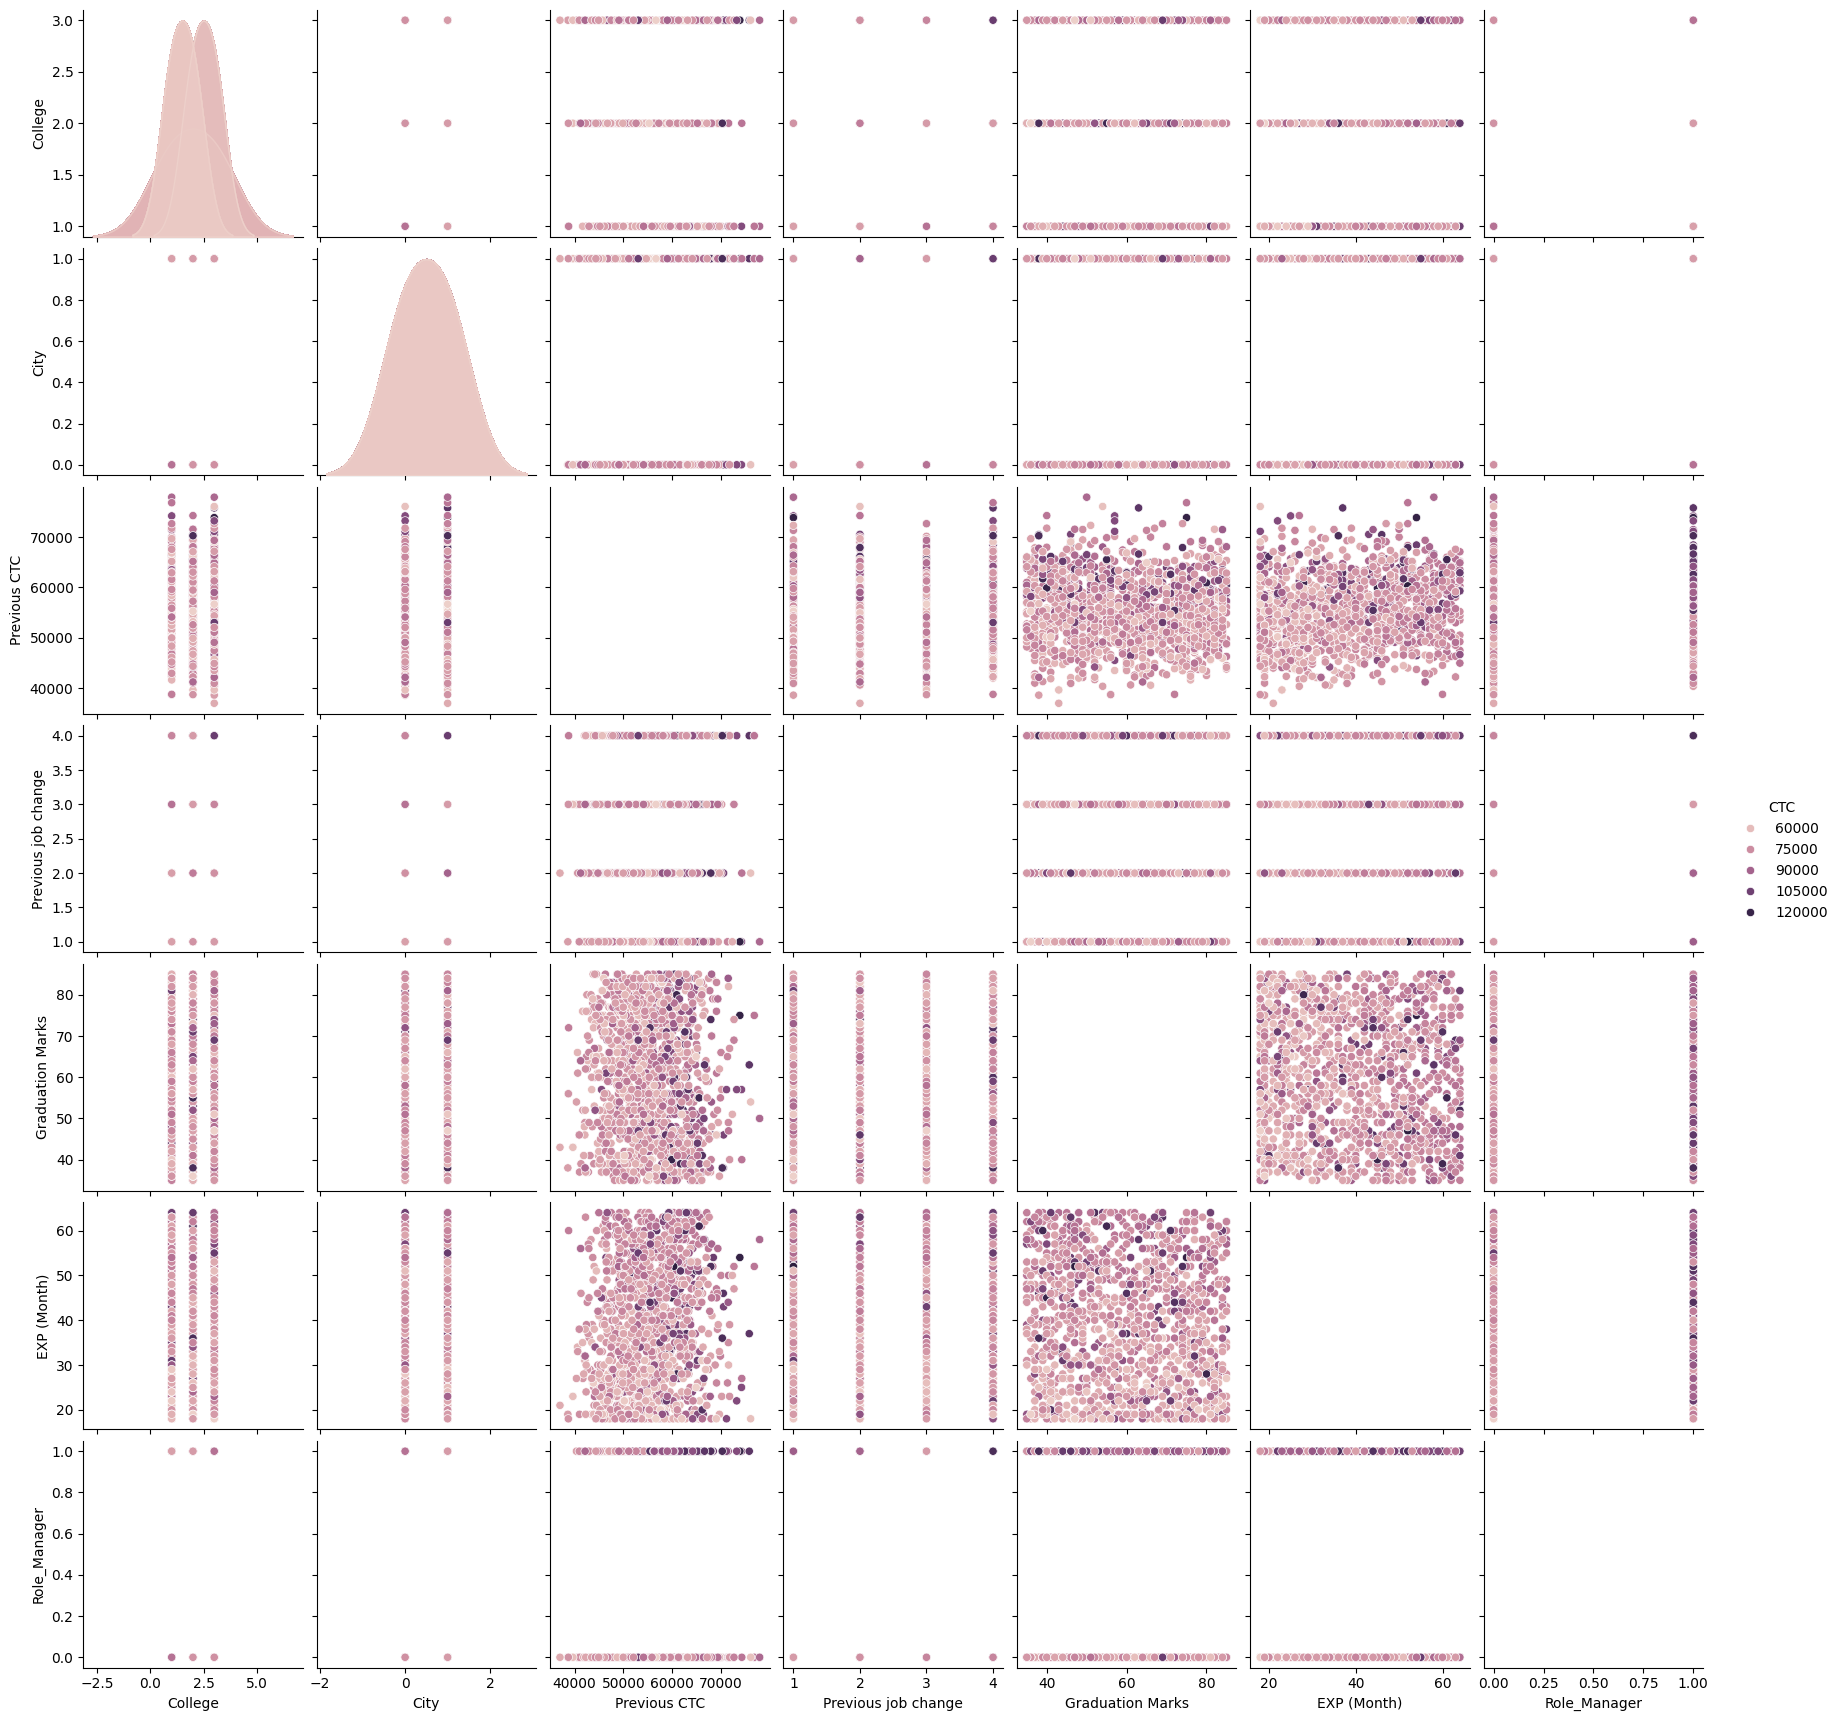

In [31]:
sns.pairplot(data=df,hue ='CTC')
plt.show()

# Applying Machine Learning models

#### Split train and test data

In [140]:
x = df.drop(['CTC'],axis = 1)
y = df['CTC']

In [141]:
# x = df[['CTC', 'EXP (Month)', 'Role_Manager']]

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [143]:
y_train.mean()

75284.838245476

In [144]:
y_train.shape

(1271,)

## Linear Regression 

In [36]:
# Create a object of Linear regression class model 
lr = LinearRegression()

In [37]:
lr.fit(x_train, y_train)

LinearRegression()

In [38]:
lr.score(x_test,y_test)*100

59.33517958385096

In [39]:
#59.33517958385096 without outlier

#### coefficient

In [40]:
lr.coef_

array([5.17509158e+02, 4.82800374e+02, 4.22242899e-01, 8.74331790e+00,
       1.94023127e+00, 2.43718541e+02, 1.86020838e+04])

#### intercepter

In [41]:
lr.intercept_

37159.52949669554

#### Prediction on test and train data

In [42]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

#### r2_score

In [43]:
r2_score_test_lr = r2_score(y_test ,y_pred_test)
r2_score_train_lr = r2_score(y_train, y_pred_train)

print(f"Liner Model r2_score_train : {r2_score_train_lr} ")
print(f"Liner Model r2_score_test  : {r2_score_test_lr}")

Liner Model r2_score_train : 0.5137747142134839 
Liner Model r2_score_test  : 0.5933517958385096


**Large difference between train and test R-squared**: If the R-squared score for the training set is significantly higher than the R-squared score for the testing set, it might suggest that the model is ```overfitting.```  and if training set is significantly lower than the R-squared score for the testing set, it might suggest that the model is ```underfitting.```

#### Mean Absolute error(MAE)

In [44]:
lr_mean_train = mean_absolute_error(y_train, y_pred_train)
lr_mean_test = mean_absolute_error(y_test, y_pred_test)
print(f"Linear Model mean_absolute_error Train: {lr_mean_train}")
print(f"Linear Model mean_absolute_error Test: {lr_mean_test}")

Linear Model mean_absolute_error Train: 6722.493770029619
Linear Model mean_absolute_error Test: 7191.231067500027


```Lower MAE```: A lower MAE indicates that the model's predictions are closer to the actual values on average. This is generally a good sign, suggesting that the model is performing well.

```Higher MAE```: A higher MAE means that the model's predictions are further away from the actual values. This indicates that the model is making larger errors on average, which is not desirable.

#### Mean Squared error(MSE)

In [45]:
lr_squared_error_train = mean_squared_error(y_train, y_pred_train)
lr_squared_error_test = mean_squared_error(y_test,y_pred_test)
print(f"mean squared error of train data : {lr_squared_error_train}")
print(f"mean squared error of test data : {lr_squared_error_test}")

mean squared error of train data : 73096299.02751341
mean squared error of test data : 77362774.9495653


``Lower MSE``: A lower MSE indicates that the model's predictions are closer to the actual values on average. This is generally a good sign, suggesting that the model is performing well.

```Higher MSE```: A higher MSE means that the model's predictions are further away from the actual values. This indicates that the model is making larger errors on average, which is not desirable.

### Feature scaling the model 

**Feature scaling** is a preprocessing technique that transforms numerical features to a common scale, typically between 0 and 1 or -1 and 1. This is important because many machine learning algorithms are sensitive to the scale of the features. If the features have different scales, it can lead to biased results.

In [46]:
# Initialize the Object of the class
scaler = StandardScaler()

# Perform Standard scaling on x_train and x_test dataset
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

Feature scaling is generally recommended for better performance when training datasets using Ridge and Lasso regularization techniques

##  Regularization Technique

### Ridge 

#### Finding Optimal Alpha for Ridge Regression using Grid Search Cross-Validation

In [47]:
# Create a Object of Ridge 
ridge = Ridge()

In [48]:
# Define the parameter grid for alpha
param_grid = {'alpha': range(0,80,3)}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=6, scoring='r2')

# Fit GridSearchCV
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best R-squared Score:{best_score}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'alpha': 15}
Best R-squared Score:0.5033140190755986

GridSearchCV tuning completed.


In [49]:
# Create a Object of Ridge 
ridge = Ridge(**best_params)

In [50]:
# Train the Ridge regression model on the scaled training data.
ridge.fit(x_train_scaled, y_train)

Ridge(alpha=15)

In [51]:
# Evaluate the performance of the trained Ridge model on the scaled test data.
ridge.score(x_test_scaled, y_test)*100

58.71618370439056

In [52]:
# Make prediction 
ridge_train_pred = ridge.predict(x_train_scaled)
ridge_test_pred = ridge.predict(x_test_scaled)

In [53]:
print(f"Coefficient is : {ridge.coef_}")
print()
print(f"Coefficient is : {ridge.intercept_}")

Coefficient is : [ 427.36450157  232.29180714 2775.98638721    8.0014558    27.9853541
 3428.36198047 7382.93331529]

Coefficient is : 75284.838245476


### Evaluate the model

#### R2_score

In [54]:
ridge_r2_score_train = r2_score(y_train, ridge_train_pred)
ridge_r2_score_test = r2_score(y_test,ridge_test_pred)
print(f"ridge model r2_score_train : {ridge_r2_score_train} ")
print(f"ridge model r2_score_test  : {ridge_r2_score_test}")

ridge model r2_score_train : 0.5137065335996583 
ridge model r2_score_test  : 0.5871618370439056


#### MSE(Mean Square error)

In [55]:
ridge_mse_train = mean_squared_error(y_train,ridge_train_pred)
ridge_mse_test = mean_squared_error(y_test,ridge_test_pred)
print(f"ridge model mse_train : {ridge_mse_train} ")
print(f"ridge model mse_test  : {ridge_mse_test}")

ridge model mse_train : 73106548.90690422 
ridge model mse_test  : 78540383.46787037


#### MAE(Mean Absolute Error)

In [56]:
ridge_mae_train = mean_absolute_error(y_train, ridge_train_pred)
ridge_mae_test = mean_absolute_error(y_test, ridge_test_pred)
print(f"ridge model mae_train : {ridge_mae_train} ")
print(f"ridge model mae_test  : {ridge_mae_test}")

ridge model mae_train : 6724.35778172138 
ridge model mae_test  : 7219.538012838159


### Lasso

### Finding Optimal Alpha for Lasso Regression using Grid Search Cross-Validation

In [57]:
lasso = Lasso()

In [58]:
# Define the parameter grid for alpha
# param_grid = {'alpha': [0.1, 5.0, 10.0, 50.0, 60.0, 80.0, 100.0, 120.0, 130.0, 150.0]}
param_grid = {'alpha': range(10, 200, 10)}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters and best score
best_params_lasso = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params_lasso}")
print(f"Best R-squared Score:{best_score}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'alpha': 150}
Best R-squared Score:0.5042350906737336

GridSearchCV tuning completed.


In [59]:
lasso = Lasso(**best_params_lasso)

In [60]:
lasso.fit(x_train_scaled,y_train)

Lasso(alpha=150)

In [61]:
#Evaluate the performance of the trained Lasso model on the scaled test data.
lasso.score(x_test_scaled, y_test)*100

58.460820462491824

In [62]:
# Make predictions
lasso_train_pred = lasso.predict(x_train_scaled)
lasso_test_pred = lasso.predict(x_test_scaled)

In [63]:
print(f"Intercept is : {lasso.coef_}")
print()
print(f"Intercept is : {lasso.intercept_}")

Intercept is : [ 276.25219293   79.76408565 2665.54348325    0.            0.
 3322.79368909 7308.59155973]

Intercept is : 75284.838245476


### Evaluate the model

#### R2 Score

In [64]:
lasso_r2_score_train = r2_score(y_train, lasso_train_pred)
lasso_r2_score_test = r2_score(y_test,lasso_test_pred)
print(f"lasso model r2_score_train : {lasso_r2_score_train} ")
print(f"lasso model r2_score_test  : {lasso_r2_score_test}")

lasso model r2_score_train : 0.5130056020459977 
lasso model r2_score_test  : 0.5846082046249182


#### MSE(Mean Square error)

In [65]:
lasso_mse_train = mean_squared_error(y_train,lasso_train_pred)
lasso_mse_test = mean_squared_error(y_test,lasso_test_pred)
print(f"lasso model mse_train : {lasso_mse_train} ")
print(f"lasso model mse_test  : {lasso_mse_test}")

lasso model mse_train : 73211922.9052172 
lasso model mse_test  : 79026199.18797515


#### MAE(Mean Absolute Error)

In [66]:
lasso_mae_train = mean_absolute_error(y_train, lasso_train_pred)
lasso_mae_test = mean_absolute_error(y_test, lasso_test_pred)
print(f"lasso model mae_train : {lasso_mae_train} ")
print(f"lasso model mae_test  : {lasso_mae_test}")

lasso model mae_train : 6723.92916772254 
lasso model mae_test  : 7241.12675793418


## KNeighborsRegressor

In [67]:
knn = KNeighborsRegressor()

In [68]:
# Define the parameter grid for alpha
param_grid = {'n_neighbors': [3,5,7,9,11,13,15,17,19,21]}

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=6, scoring='r2')

# Fit GridSearchCV
grid_search_knn.fit(x_train_scaled, y_train)

# Get the best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_
print(f"Best Parameters: {best_params_knn}")
print(f"Best R-squared Score:{best_score_knn}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'n_neighbors': 19}
Best R-squared Score:0.539792599885709

GridSearchCV tuning completed.


In [69]:
knn = KNeighborsRegressor(**best_params_knn)
knn.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=19)

In [70]:
knn.score(x_test_scaled,y_test)*100

60.62449021113516

In [71]:
# Make predictions
knn_train_pred = knn.predict(x_train_scaled)
knn_test_pred = knn.predict(x_test_scaled)

### Evaluate the model

#### R2 Score

In [72]:
knn_r2_score_train = r2_score(y_train, knn_train_pred)
knn_r2_score_test = r2_score(y_test,knn_test_pred)
print(f"KNeighborsRegressor model r2_score_train : {knn_r2_score_train} ")
print(f"KNeighborsRegressor model r2_score_test  : {knn_r2_score_test}")

KNeighborsRegressor model r2_score_train : 0.5957357730922614 
KNeighborsRegressor model r2_score_test  : 0.6062449021113516


#### MSE(Mean Squared Error)

In [73]:
knn_mse_train = mean_squared_error(y_train,knn_train_pred)
knn_mse_test = mean_squared_error(y_test,knn_test_pred)
print(f"KNeighborsRegressor  model mse_train : {knn_mse_train} ")
print(f"KNeighborsRegressor  model mse_test  : {knn_mse_test}")

KNeighborsRegressor  model mse_train : 60774747.17995028 
KNeighborsRegressor  model mse_test  : 74909926.34780289


#### MAE(Mean Absolute Error)

In [74]:
knn_mae_train = mean_absolute_error(y_train, knn_train_pred)
knn_mae_test = mean_absolute_error(y_test, knn_test_pred)
print(f"KNeighborsRegressor   model mae_train : {knn_mae_train} ")
print(f"KNeighborsRegressor   model mae_test  : {knn_mae_test}")

KNeighborsRegressor   model mae_train : 6158.718302621226 
KNeighborsRegressor   model mae_test  : 7056.879869248595


## DecisionTreeRegressor

### Finding Optimal max_depth for DecisionTreeRegressor Regression using Grid Search Cross-Validation

In [75]:
dtr = DecisionTreeRegressor()

In [76]:
# Define the parameter grid for alpha
param_grid = {'max_depth': [2, 4, 6,8], 'min_samples_split': [2, 5, 10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters and best score
best_params_dtr = grid_search.best_params_
best_score_dtr = grid_search.best_score_
print(f"Best Parameters: {best_params_dtr}")
print(f"Best R-squared Score:{best_score_dtr}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Best R-squared Score:0.5648157009481987

GridSearchCV tuning completed.


In [77]:
# Initialize the DecisionTreeRegressor object 
dtr = DecisionTreeRegressor(random_state=42,**best_params_dtr)

In [78]:
# Train the data 
dtr.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [79]:
#Evaluate the performance of the trained DecisionTreeRegressor model on the scaled test data.
dtr.score(x_test_scaled, y_test)*100

60.18039727654849

In [80]:
# Make predictions
dtr_train_pred = dtr.predict(x_train_scaled)
dtr_test_pred = dtr.predict(x_test_scaled)

### Evaluate the model

#### R2_Score

In [81]:
dtr_r2_score_train = r2_score(y_train, dtr_train_pred)
dtr_r2_score_test = r2_score(y_test, dtr_test_pred)
print(type(dtr_r2_score_test))
print(f"DecisionTreeRegressor model r2_score_train : {dtr_r2_score_train} ")
print(f"DecisionTreeRegressor model r2_score_test  : {dtr_r2_score_test}")

<class 'float'>
DecisionTreeRegressor model r2_score_train : 0.6342808272470002 
DecisionTreeRegressor model r2_score_test  : 0.6018039727654849


#### MSE(Mean Square Error)

In [82]:
dtr_mse_train = mean_squared_error(y_train,dtr_train_pred)
dtr_mse_test = mean_squared_error(y_test,dtr_test_pred)
print(f"DecisionTreeRegressor model mse_train : {dtr_mse_train} ")
print(f"DecisionTreeRegressor model mse_test  : {dtr_mse_test}")

DecisionTreeRegressor model mse_train : 54980106.53313797 
DecisionTreeRegressor model mse_test  : 75754790.81304657


#### MAE(Mean Absoulte Error)

In [83]:
dtr_mae_train = mean_absolute_error(y_train, dtr_train_pred)
dtr_mae_test = mean_absolute_error(y_test, dtr_test_pred)
print(f"DecisionTreeRegressor model mae_train : {dtr_mae_train} ")
print(f"DecisionTreeRegressor model mae_test  : {dtr_mae_test}")

DecisionTreeRegressor model mae_train : 5847.5724909532 
DecisionTreeRegressor model mae_test  : 6863.225742145251


## Ensemble Technique 

### RandomForestRegressor

#### Tune the Random Forest Regressor using Grid Search Cross-Validation

In [84]:
random_forest = RandomForestRegressor()

In [85]:
# Tune the Random Forest Regressor by setting a parameter grid
param_grid_rf = {
    'n_estimators': [100,200,300],
    'max_depth': [3,5,7],
    'min_samples_split': [2,5,7],
    'min_samples_leaf': [2,4,6]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search_rf.fit(x_train_scaled, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f"Best Parameters: {best_params_rf}")
print(f"Best R-squared Score:{best_score_rf}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best R-squared Score:0.5995993060284455

GridSearchCV tuning completed.


In [86]:
best_params_rf

{'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [87]:
# Initialize the DecisionTreeRegressor object 
random_forest = RandomForestRegressor(**best_params_rf,random_state=42)

In [88]:
# Train the Model 
random_forest.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=2, n_estimators=300,
                      random_state=42)

In [89]:
#Evaluate the performance of the trained DecisionTreeRegressor model on the scaled test data.
random_forest.score(x_test_scaled, y_test)*100

61.443531263649696

In [90]:
# Make predictions
random_forest_train_pred = random_forest.predict(x_train_scaled)
random_forest_test_pred = random_forest.predict(x_test_scaled)

### Evaluate the model

#### R2_Score

In [91]:
random_forest_r2_score_train = r2_score(y_train, random_forest_train_pred)
random_forest_r2_score_test = r2_score(y_test, random_forest_test_pred)
print(f"RandomForestRegressor model r2_score_train : {random_forest_r2_score_train} ")
print(f"RandomForestRegressor model r2_score_test  : {random_forest_r2_score_test}")

RandomForestRegressor model r2_score_train : 0.7653940061584094 
RandomForestRegressor model r2_score_test  : 0.614435312636497


#### MSE(Mean Square Error)

In [92]:
random_forest_mse_train = mean_squared_error(y_train,random_forest_train_pred)
random_forest_mse_test = mean_squared_error(y_test,random_forest_test_pred)
print(f"RandomForestRegressor model mse_train : {random_forest_mse_train} ")
print(f"RandomForestRegressor model mse_test  : {random_forest_mse_test}")

RandomForestRegressor model mse_train : 35269309.06473117 
RandomForestRegressor model mse_test  : 73351741.95225658


#### MAE(Mean Absoulte Error)

In [93]:
random_forest_mae_train = mean_absolute_error(y_train, random_forest_train_pred)
random_forest_mae_test = mean_absolute_error(y_test, random_forest_test_pred)
print(f"RandomForestRegressor model mae_train : {random_forest_mae_train} ")
print(f"RandomForestRegressor model mae_test  : {random_forest_mae_test}")

RandomForestRegressor model mae_train : 4669.7531578472635 
RandomForestRegressor model mae_test  : 6759.246446136038


### Gradient Boosting Regressor

#### Tune the Random Gradient Boosting Regressor using Grid Search Cross-Validation

In [94]:
gb = GradientBoostingRegressor()

In [95]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2],
    'max_depth': [3,5,7],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [2,4,6],
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid_gb, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search_gb.fit(x_train_scaled, y_train)

# Get the best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_
print(f"Best Parameters: {best_params_gb}")
print(f"Best R-squared Score:{best_score_gb}")
print()
print("GridSearchCV tuning completed.")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best R-squared Score:0.5941374742073376

GridSearchCV tuning completed.


In [96]:
best_params_gb

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [97]:
# Initialize the Model object
gb = GradientBoostingRegressor(**best_params_gb,random_state=42)

In [98]:
# Train the Model
gb.fit(x_train_scaled, y_train)

GradientBoostingRegressor(min_samples_leaf=2, random_state=42)

In [99]:
#Evaluate the performance of the trained DecisionTreeRegressor model on the scaled test data.
gb.score(x_test_scaled, y_test)*100

61.70794176822403

In [100]:
# Make predictions
gb_train_pred = gb.predict(x_train_scaled)
gb_test_pred = gb.predict(x_test_scaled)

### Evaluate the model

#### R2_Score

In [101]:
gb_r2_score_train = r2_score(y_train, gb_train_pred)
gb_r2_score_test = r2_score(y_test, gb_test_pred)
print(f"GradientBoostingRegressor model r2_score_train : {gb_r2_score_train} ")
print(f"GradientBoostingRegressor model r2_score_test  : {gb_r2_score_test}")

GradientBoostingRegressor model r2_score_train : 0.7132953327710867 
GradientBoostingRegressor model r2_score_test  : 0.6170794176822403


#### MSE(Mean Squared Error)

In [102]:
gb_mse_train = mean_squared_error(y_train,gb_train_pred)
gb_mse_test = mean_squared_error(y_test,gb_test_pred)
print(f"GradientBoostingRegressor model mse_train : {gb_mse_train} ")
print(f"GradientBoostingRegressor model mse_test  : {gb_mse_test}")

GradientBoostingRegressor model mse_train : 43101522.4855045 
GradientBoostingRegressor model mse_test  : 72848714.27008927


#### (MAE)Mean Absoulte Error

In [103]:
gb_mae_train = mean_absolute_error(y_train, gb_train_pred)
gb_mae_test = mean_absolute_error(y_test, gb_test_pred)
print(f"GradientBoostingRegressor model mae_train : {gb_mae_train} ")
print(f"GradientBoostingRegressor model mae_test  : {gb_mae_test}")

GradientBoostingRegressor model mae_train : 5127.775286684329 
GradientBoostingRegressor model mae_test  : 6769.571606947162


## Analysis of Regression Models basis on R2_Score and Mean Absolute Error

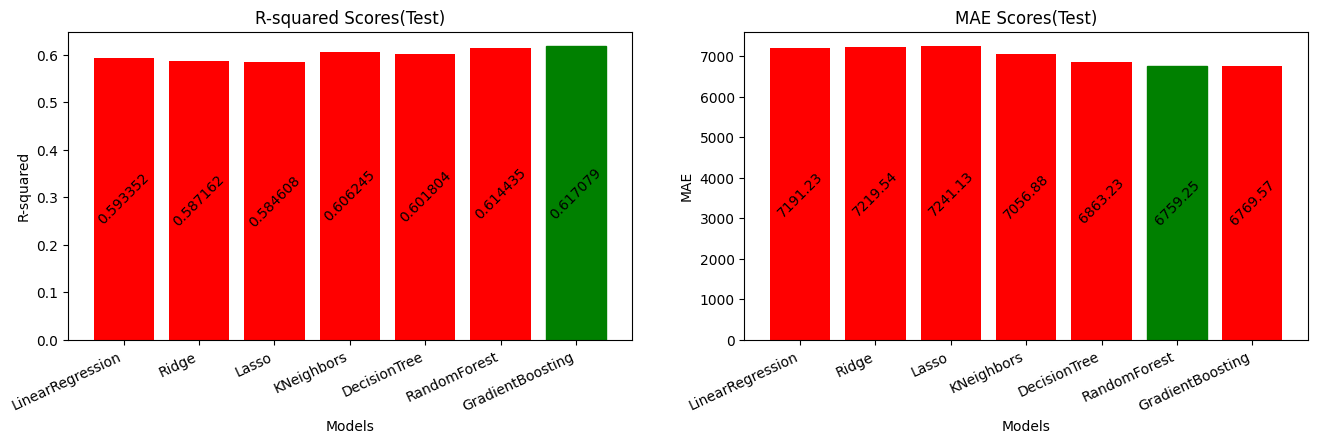

In [104]:
# Create a list of model names that is also mention in function  
models = ['LinearRegression', 'Ridge', 'Lasso', 'KNeighbors', 'DecisionTree', 
              'RandomForest', 'GradientBoosting']

r2_values = [r2_score_test_lr,ridge_r2_score_test,lasso_r2_score_test,knn_r2_score_test, dtr_r2_score_test, random_forest_r2_score_test, gb_r2_score_test]
mae_values = [lr_mean_test,ridge_mae_test, lasso_mae_test, knn_mae_test, dtr_mae_test,random_forest_mae_test, gb_mae_test]
# Create a DataFrame for Seaborn to plot bar chart 
model_data = pd.DataFrame({'Model': models, 'R-squared': r2_values, 'MAE': mae_values})

# Create the figure and subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot R2_score
ax1.bar(models, r2_values, color='red')
ax1.set_xlabel('Models',loc='center')
ax1.set_ylabel('R-squared')
ax1.set_title('R-squared Scores(Test)')
best_model_index = r2_values.index(max(r2_values))
ax1.patches[best_model_index].set_color('green')
for bar in ax1.containers:
    ax1.bar_label(bar, label_type='center',rotation=45)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=25, ha="right") 

# Plot Mean Absolute Error
ax2.bar(models, mae_values, color='red')
ax2.set_xlabel('Models')
ax2.set_ylabel('MAE')
ax2.set_title('MAE Scores(Test)')
best_model_index = mae_values.index(min(mae_values))
ax2.patches[best_model_index].set_color('green')
for bar in ax2.containers:
    ax2.bar_label(bar, label_type='center',rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25, ha="right") 
plt.savefig('fig1.jpg',dpi = 200)
plt.show()

Based on the provided **R-squared scores**, ```GradientBoostingRegressor``` is best model .It has the highest R-squared score of 0.6170794176822403, indicating that it explains the most variance in the target variable.

 the best model is ```RandomForestRegressor```, with an **MAE score** of 6759.246446136038. This means that the Random Forest Regressor model has the lowest average absolute error, which indicates that it is the most accurate model on average.

#  Performance of Regression Models on Correlation Features for CTC Prediction

### I selected only features that have a high correlation with the dependent variable, CTC

- ```Correlation coefficients range from -1 to 1..```

- -1: Indicates a perfect negative correlation, meaning the variables move in opposite directions perfectly.
- 0: Indicates no correlation between the variables.
- 1: Indicates a perfect positive correlation, meaning the variables move in the same direction perfectly.

#### Correlation Analysis: Relationship Between Column and Dependent(CTC) Variable

In [105]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,-0.041979,0.055060,-0.003539,-0.011752,0.029592,0.014749
City,0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,-0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,-0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),-0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


In [106]:
# Split the independent variables and dependent variable 
x_corr = df[['Previous CTC','EXP (Month)','Role_Manager']]
y_corr = df['CTC']

#### Define Function to Train and Evaluate Regression Models Using Correlation Features

In [107]:
def train_model(x,y):
    models = ['LinearRegression', 'Ridge', 'Lasso', 'KNeighborsRegressor', 'DecisionTreeRegressor', 
              'RandomForestRegressor', 'GradientBoostingRegressor']
    r2_scores = []
    mae_scores = []

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
    
    # Initialize the Object of the class StandardScaler
    scaler = StandardScaler()
    
    # Perform Standard scaling on x_train and x_test dataset
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.fit_transform(x_test)

    for model_type in models:    
        if model_type == 'LinearRegression':
            model = LinearRegression()
        elif model_type == 'Ridge':
            model = Ridge()
        elif model_type == 'Lasso':
            model = Lasso()
        elif model_type == 'KNeighborsRegressor':
            model = KNeighborsRegressor()
        elif model_type == 'DecisionTreeRegressor':
            model = DecisionTreeRegressor()
        elif model_type == 'RandomForestRegressor':
            model = RandomForestRegressor()
        elif model_type == 'GradientBoostingRegressor':
            model = GradientBoostingRegressor()
        else:
            raise ValueError("Invalid model type. Choose from: 'GradientBoosting', 'RandomForest' ,'DecisionTree', 'KNeighbors','Lasso', 'Ridge', 'Linear'")
            
        param_grid = {}
        if model_type == 'GradientBoosting':
            param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [2, 4, 6], 'min_samples_split': [2, 5, 10]}
        elif model_type == 'RandomForest':
            param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [2, 4, 6], 'min_samples_split': [2, 5, 10]}
        elif model_type == 'DecisionTree':
            param_grid = {'max_depth': [2, 4, 6], 'min_samples_split': [2, 5, 10]}
        elif model_type == 'KNeighborsRegressor':
            param_grid = {'n_neighbors': [5, 10, 15], 'weights': ['uniform', 'distance']}
        elif model_type == 'Lasso':
            param_grid = {'alpha': range(10, 200, 10)}
        elif model_type == 'Ridge':
            param_grid = {'alpha': range(0,80,3)}

        grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
        
        grid_search.fit(x_train_scaled, y_train)
        
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        y_pred_test = best_model.predict(x_test_scaled)
        accuracy  = best_model.score(x_test_scaled,y_test)

        r2_score_test = r2_score(y_test, y_pred_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        

        r2_scores.append(r2_score_test)
        mae_scores.append(mae_test)

    return r2_scores, mae_scores,accuracy

In [108]:
r2_scores, mae_scores, accuracy = train_model(x_corr, y_corr)
accuracy 

0.6068552509949459

#### Analysis of Regression Models with Correlation Features on the basis of R2_Score and Mean Absolute Error

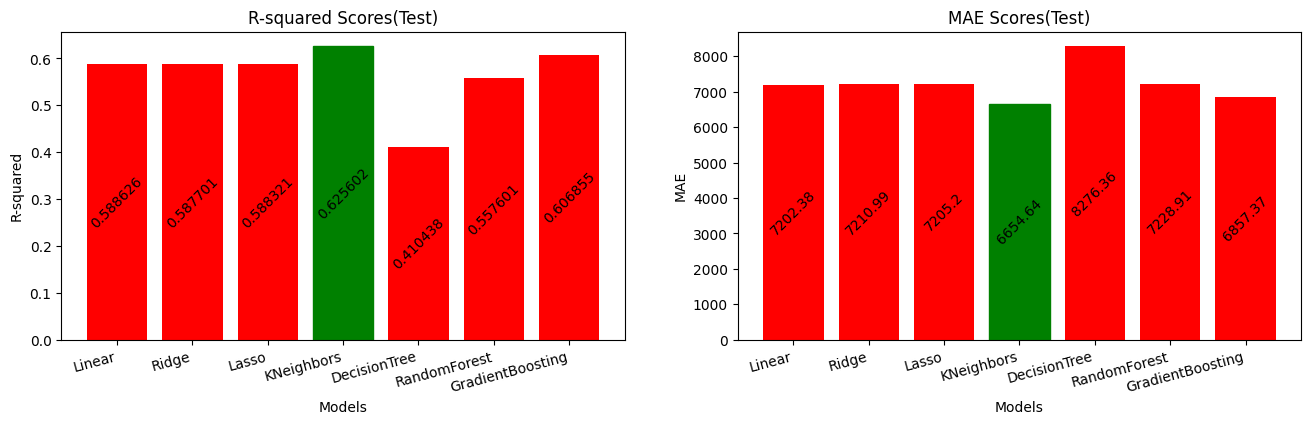

In [109]:
# Create a list of model names that is also mention in function  
models = ['Linear', 'Ridge', 'Lasso', 'KNeighbors', 'DecisionTree', 
              'RandomForest', 'GradientBoosting']

# Create a DataFrame for Seaborn to plot bar chart 
model_data = pd.DataFrame({'Model': models, 'R-squared': r2_scores, 'MAE': mae_scores})

# Create the figure and subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot R2_score
ax1.bar(models, r2_scores, color='red')
ax1.set_xlabel('Models')
ax1.set_ylabel('R-squared')
ax1.set_title('R-squared Scores(Test)')
best_model_index = r2_scores.index(max(r2_scores))
ax1.patches[best_model_index].set_color('green')
# # Set the y-axis limits and ticks
# ax1.set_ylim(0.1, 0.8)
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

for bar in ax1.containers:
    ax1.bar_label(bar, label_type='center',rotation=45)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right") 

# Plot Mean Absolute Error
ax2.bar(models, mae_scores, color='red')
ax2.set_xlabel('Models')
ax2.set_ylabel('MAE')
ax2.set_title('MAE Scores(Test)')
best_model_index = mae_scores.index(min(mae_scores))
ax2.patches[best_model_index].set_color('green')
for bar in ax2.containers:
    ax2.bar_label(bar, label_type='center',rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha="right") 
plt.savefig('fig2.jpg')
plt.show()

The model with the highest R2 score is ```KNeighborsRegressor```, with an R2 score of 0.6256019396835051. This means that the KNeighborsRegressor model explains 62.56% of the variance in the target variable

The model with the lowest MAE score is ```KNeighborsRegressor```, with an MAE score of 6654.640220677243. This means that the KNeighborsRegressor model has the lowest average absolute error, which indicates that it is the most accurate model on average.

# Conclusion

## Scenario 1 : Model Training with All Features

In this scenario, the entire dataset was used to train the model, including features with varying levels of correlation with the dependent variable. This approach aims to capture the potential influence of all features on the target variable.

**R2_Score :**
- Linear Regression: 0.593352
- Ridge: 0.587162
- Lasso: 0.584608
- KNeighborsRegressor: 0.606245
- DecisionTreeRegressor: 0.601804
- RandomForestRegressor: 0.614435 
- ```GradientBoostingRegressor: 0.617079```

Based on the provided **R-squared scores**, ```GradientBoostingRegressor``` is best model .It has the highest R-squared score of 0.6170794176822403, indicating that it explains the most variance in the target variable.

**MAE(Mean Absolute Error) :**
- Linear Regression: 6769.57
- Ridge: 7219.54
- Lasso: 7241.13
- KNeighborsRegressor: 7056.88
- DecisionTreeRegressor: 6863.23
- ```RandomForestRegressor: 6759.25```
- GradientBoostingRegressor: 6769.57

<!-- ![R Squared Scores and MAE scores](all.jpg) -->
![R Squared Scores and MAE scores with x-axis label and y-axis label](fig1.jpg)

- **Best Model :**
GradientBoostingRegressor has a slightly higher R2 score than RandomForestRegressor (0.617079 vs. 0.614435). However, RandomForestRegressor has a lower MAE score (6759.25 vs. 6769.57). This means that RandomForestRegressor is more accurate on average, even though it explains slightly less of the variance in the target variable.

    In general, **MAE is a more important metric than R2 for regression problems**. This is because MAE measures the average absolute error of the model, which is a more natural measure of accuracy. R2, on the other hand, measures the proportion of variance in the target variable that is explained by the model. While R2 is useful for understanding how well the model fits the data, it does not directly measure the accuracy of the model.
    
    Therefore, based on the MAE scores, RandomForestRegressor is still the best choice for predicting CTC.

## Scenario 2: Model Training with Highly Correlated Features

In this scenario, only the features that exhibited a strong correlation with the dependent variable were selected for model training. This approach focuses on the most influential features, potentially reducing the complexity of the model and improving its interpretability.

**R2 Scores:**

- Linear Regression: 0.5886
- Ridge: 0.5877
- Lasso: 0.5883
- ```KNeighborsRegressor: 0.6256```
- DecisionTreeRegressor: 0.3852
- RandomForestRegressor: 0.5543
- GradientBoostingRegressor: 0.6067

- The model with the highest R2 score is ```KNeighborsRegressor```, with an R2 score of 0.6256019396835051. This means that the KNeighborsRegressor model explains 62.56% of the variance in the target variable

**MAE(Mean Absolute Error):**
- Linear Regression: 7202.38
- Ridge: 7210.99
- Lasso: 7205.20
- ```KNeighborsRegressor: 6654.64```
- DecisionTreeRegressor: 8497.61
- RandomForestRegressor: 7218.19
- GradientBoostingRegressor: 6858.46

- The model with the lowest MAE score is ```KNeighborsRegressor```, with an MAE score of 6654.640220677243. This means that the KNeighborsRegressor model has the lowest average absolute error, which indicates that it is the most accurate model on average.

![R Squared Scores and MAE scores with x-axis label and y-axis label](fig2.jpg)

**Best Model :** Based on the R2 scores and MAE, the best model is ```KNeighborsRegressor```, followed by GradientBoostingRegressor.
KNeighborsRegressor has the highest R2 score (0.6256) and the lowest MAE (6654.64), indicating that it is the most accurate model. GradientBoostingRegressor has the second highest R2 score (0.6067) and the second lowest MAE (6858.46), indicating that it is also a very accurate model.


There are several steps that could be taken to improve the performance of the KNeighborsRegressor model even further, including:

- Tuning the hyperparameters. The hyperparameters of a model are the parameters that control its behavior, such as the number of neighbors to consider and the distance metric to use. Tuning the hyperparameters can help improve the model's performance on the test set.
- Adding more features to the model. The more features that are available to the model, the better it will be able to predict the target variable. Adding additional features that are relevant to the target variable can help improve the model's performance.
- Using a different value for k. The value of k is the number of neighbors to consider when making a prediction. Experimenting with different values for k can help improve the model's performance.
- Using a weighted average. When making a prediction, the KNeighborsRegressor model can use a weighted average of the target values of the k nearest neighbors. The weights can be based on the distance between the data point and its neighbors. Using a weighted average can help improve the model's performance.

## Q4 Which model’s performance is best and what could be the possible reason for that?
The best performing model was the Random Forest Regression model. This model has many advantages over the other models, including:
- It can handle both linear and non-linear relationships between features and the target variable.
- It is less likely to overfit the data than other models, such as linear regression, making it more robust to noise and outliers.
- It can handle missing data without preprocessing.

## Q5 What steps can you take to improve this selected model’s performance even further?
**When we select all feature the best model is Random Forest Regression model so ,There are several steps that could be taken to improve the performance of the Random Forest Regression model even further, including:**
- Tuning the model hyperparameters. The hyperparameters of a model are the parameters that control its behavior, such as the number of trees in a random forest. Tuning the hyperparameters can help improve the model's performance on the test set.
- Adding more features to the model. The more features that are available to the model, the better it will be able to predict the target variable. Adding additional features that are relevant to the target variable can help improve the model's performance.
- Using a different model. If the Random Forest Regression model is not performing well enough, it may be necessary to try a different model, such as a gradient boosted regression model or a neural network.

**When We select only highly correleted value the best model is KNeighborsRegressor,There are several steps that could be taken to improve the performance of the KNeighborsRegressor model even further, including:**
- Tuning the hyperparameters. The hyperparameters of a model are the parameters that control its behavior, such as the number of neighbors to consider and the distance metric to use. Tuning the hyperparameters can help improve the model's performance on the test set.
- Adding more features to the model. The more features that are available to the model, the better it will be able to predict the target variable. Adding additional features that are relevant to the target variable can help improve the model's performance.
- Using a different value for k. The value of k is the number of neighbors to consider when making a prediction. Experimenting with different values for k can help improve the model's performance.
- Using a weighted average. When making a prediction, the KNeighborsRegressor model can use a weighted average of the target values of the k nearest neighbors. The weights can be based on the distance between the data point and its neighbors. Using a weighted average can help improve the model's performance.